<a href="https://colab.research.google.com/github/Suad-kt24/Softwarelap/blob/main/IPLAP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1Create a synthetic image
image = np.zeros((8, 8))
print(image)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


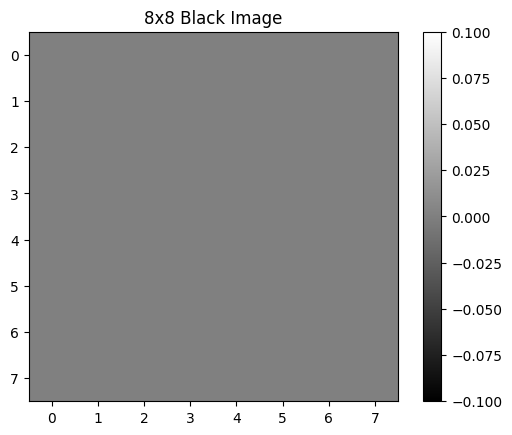

In [ ]:
#2.2Visualise the image
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()

Questions
1. What is the spatial resolution of this image? 8*8=64pixels
2. What does each value represent? 0-255 grayspace

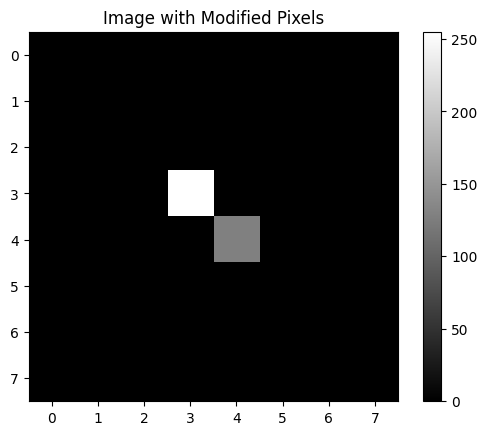

In [ ]:
#3 Modify individual pixels
image[3, 3] = 255
image[4, 4] = 128

plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

Questions
1. Which pixel is brighter and why? it represent white
2. How does quantisation affect visual appearance? limit nimber of intensity level

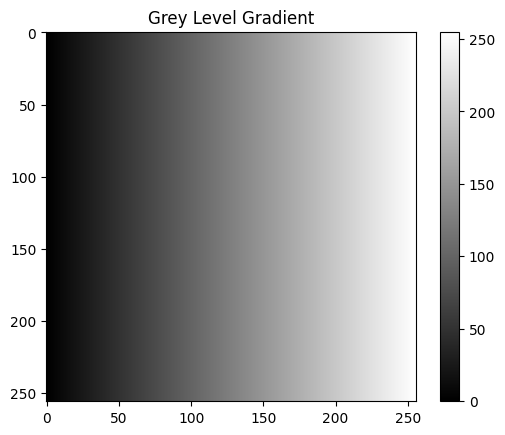

In [ ]:
#4 Generate a gradient image
gradient = np.tile(np.linspace(0, 255, 256), (256, 1))

plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()

Questions
1. How many grey levels are visible? 256
2. What data type is used to store the pixel values? integer [0,256]

(1200, 676, 3)
uint8


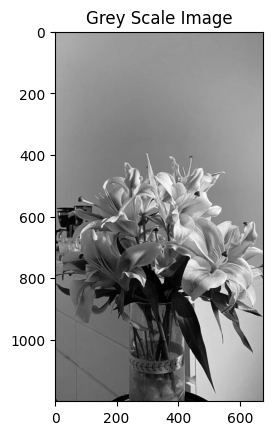

In [ ]:
#5 Load and inspect an image
from matplotlib.image import imread

image = imread('/content/download.jpg')
print(image.shape)
print(image.dtype)
# Convert the image to grey scale by averaging the colour channels.
gray = image.mean(axis=2)

plt.imshow(gray, cmap='gray')
plt.title("Grey Scale Image")
plt.show()

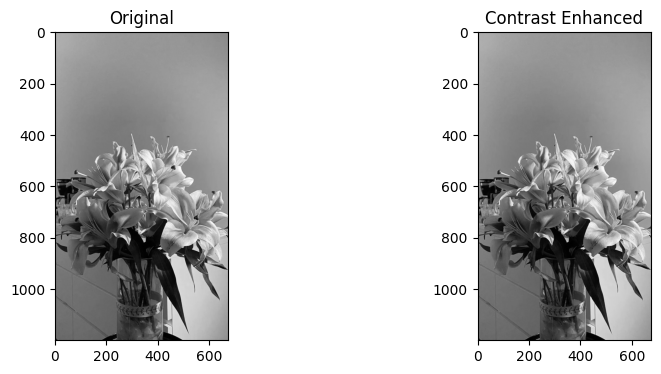

In [ ]:
#6 Image enhancement by contrast stretching
min_val = gray.min()
max_val = gray.max()

enhanced = (gray - min_val) / (max_val - min_val) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')

plt.title("Contrast Enhanced")
plt.show()

Questions
1. Which image has better visibility of details? enhanced image
2. Is this enhancement subjective or objective? objective , based on mathimatical operation

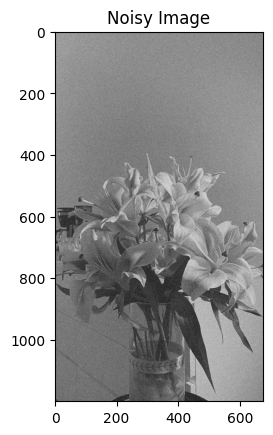

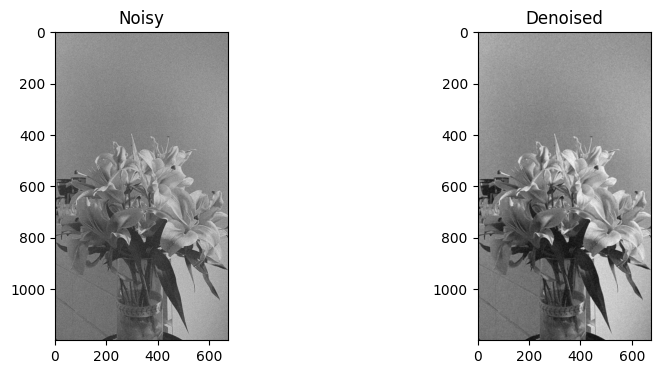

In [ ]:
#7 Add artificial noise
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise

plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()
# Simple smoothing filter
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised = mean_filter(noisy)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()

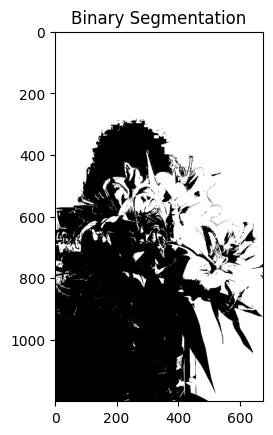

In [ ]:
#8 Simple threshold segmentation
threshold = gray.mean()
binary = gray > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

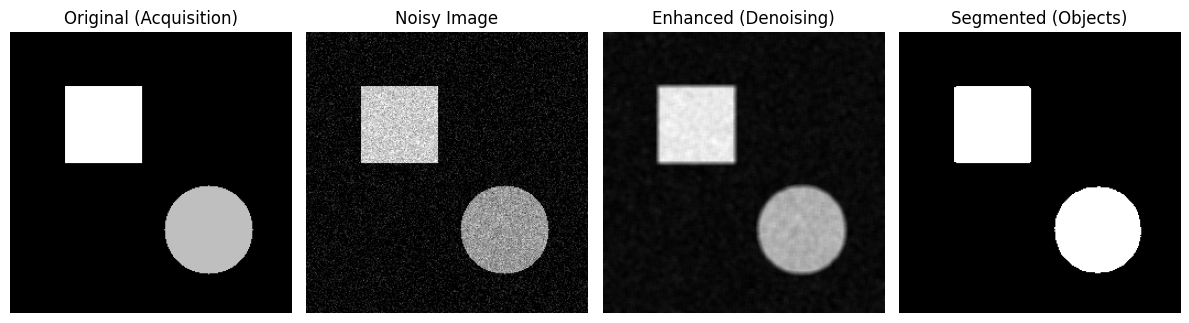

In [1]:
image = np.zeros((256, 256))
# Add two synthetic objects: a square and a circle
image[50:120, 50:120] = 0.8  # Square
y, x = np.ogrid[:256, :256]
center_y, center_x = 180, 180
mask = (x - center_x)**2 + (y - center_y)**2 <= 40**2
image[mask] = 0.6  # Circle
#Adding Noise
noise = np.random.normal(0, 0.1, image.shape)
noisy_image = np.clip(image + noise, 0, 1)
#Image Enhancement & Denoising (Simple Box Filter)
def box_filter(img, size=3):
    pad = size // 2
    padded_img = np.pad(img, pad, mode='edge')
    denoised = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            denoised[i, j] = np.mean(padded_img[i:i+size, j:j+size])
    return denoised
enhanced_image = box_filter(noisy_image, size=5)
#Segmentation (Thresholding)
threshold = 0.4
segmented_image = (enhanced_image > threshold).astype(float)
#Output images
titles = ['Original (Acquisition)', 'Noisy Image', 'Enhanced (Denoising)', 'Segmented (Objects)']
images = [image, noisy_image, enhanced_image, segmented_image]
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Reflection questions
1. Where does image processing end and image analysis begin in your mini project? Image processing ends at enhancement and noise removal, analysis begins at segmentation and interpretation.
2. Which steps correspond to low level processing only? Noise removing, filtering, contrast enhancement.
3. Why is digitisation always an approximation of reality? Noise removing, filtering, contrast enhancement.